## Upload two ZIP files:


In [1]:
  from google.colab import files
  uploaded = files.upload()


Saving Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia.zip to Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia.zip


# Extract them to separate folders

In [2]:
import zipfile

for filename in uploaded.keys():
    foldername = filename.split('.')[0].replace(' ', '_').lower() + "_dataset"
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(foldername)
    print(f"✅ Extracted {filename} to {foldername}")

✅ Extracted Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia.zip to chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset


#Inspect extracted folders

In [3]:
import os

# Automatically list all *_dataset folders
dataset_folders = [d for d in os.listdir() if d.endswith('_dataset') and os.path.isdir(d)]

for folder in dataset_folders:
    print(f"\n📁 Inspecting: {folder}")
    for root, dirs, files in os.walk(folder):
        print("📂", root)
        for file in files[:5]:
            print("   └──", file)



📁 Inspecting: chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset
📂 chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset
📂 chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia
📂 chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Training
📂 chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Training/normal
   └── normal-7441.jpg
   └── normal-590.jpg
   └── normal-7502.jpg
   └── normal-7330.jpg
   └── normal-689.jpg
📂 chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Training/pneumonia
   └── person788_virus_1419.jpeg
   └── pneumonia-5048.jpg
   └── pneumonia-4559.jpg
   └── pneumonia-4117.jpg
   └── pneumonia-5097.jpg
📂 chest-x-ray_epic_hospital_chittagong,_ban

#Load & Preprocess Dataset===> wiht Augmentaiton

✅ Classes: ['normal', 'pneumonia']
Training samples: 2713
Testing samples: 641


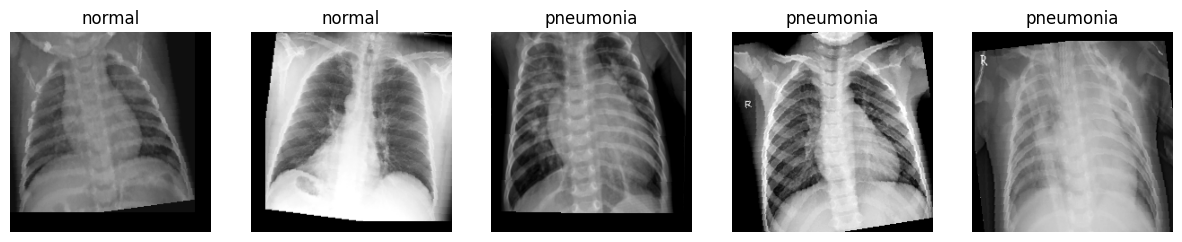

In [4]:
# ===============================
# Step 1: Import Libraries
# ===============================
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ===============================
# Step 2: Parameters
# ===============================
IMG_SIZE = 224
BATCH_SIZE = 16

# ===============================
# Step 3: Define Transforms
# ===============================
# Training: with augmentation
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),       # flip images
    transforms.RandomRotation(10),                # small random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # brightness/contrast
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # random shift
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # normalize grayscale
])

# Testing: only resize + normalize (no augmentation here!)
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ===============================
# Step 4: Dataset Paths
# ===============================
train_dir = 'chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Training'
test_dir  = 'chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Testing'

# ===============================
# Step 5: Load Datasets
# ===============================
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset  = datasets.ImageFolder(test_dir, transform=test_transform)

# ===============================
# Step 6: DataLoaders
# ===============================
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ===============================
# Step 7: Verify Classes
# ===============================
class_names = train_dataset.classes
print("✅ Classes:", class_names)
print("Training samples:", len(train_dataset))
print("Testing samples:", len(test_dataset))

# ===============================
# Step 8: Visualize Augmented Images
# ===============================
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 5, figsize=(15,3))

for i in range(5):
    img = images[i].permute(1, 2, 0).numpy()   # C,H,W → H,W,C
    img = (img * 0.5) + 0.5                    # unnormalize
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(class_names[labels[i]])
    axes[i].axis("off")

plt.show()


#Visualize Sample Images

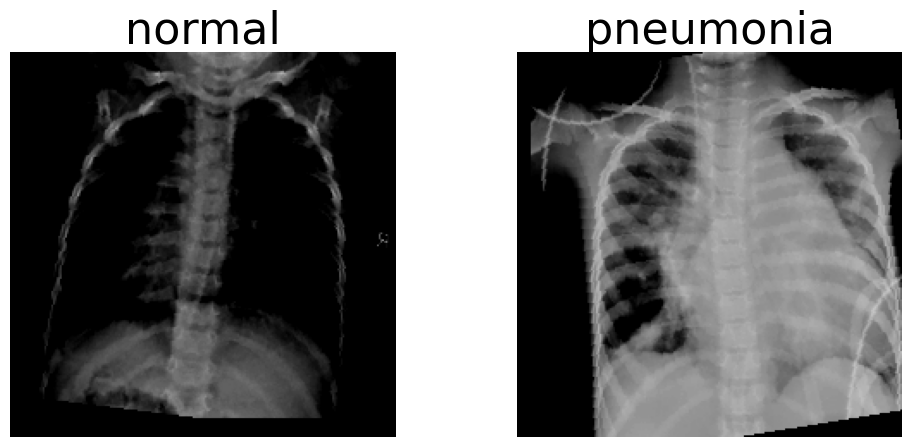

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title, fontsize=32)
    plt.axis('off')

# Find the 2nd image per class
examples = {}
counts = {i: 0 for i in range(len(class_names))}

for img, label in train_dataset:
    if counts[label] == 41:   # pick the 2nd image
        examples[label] = img
    counts[label] += 1
    if len(examples) == len(class_names):
        break

# Prepare images and titles sorted by label index
imgs = [examples[i] for i in range(len(class_names))]
titles = [class_names[i] for i in range(len(class_names))]

# Show images in one grid
plt.figure(figsize=(12, 5))
for i in range(len(class_names)):
    plt.subplot(1, len(class_names), i + 1)
    imshow(imgs[i], titles[i])
plt.show()



#==== > 🔹 Final Setup for your Chest X-ray project <======
		===============================================================================

# Step 1: Model backbone: CoAtNet-0 (or CoAtNet-1/2 if GPU allows) **** [ Hybrid architecture(CoAtNet) = strong feature learning. ]

# Step 2 Training optimizer: SAM (instead of vanilla SGD/Adam) **** [ SAM optimizer = robustness + generalization. ]


# Step 3 Explainability: Grad-CAM (to visualize regions influencing predictions)
## [ Grad-CAM = interpretability (critical in medical imaging).]   


# 1--Install Dependencise ===> for Runing the Deep Learning Algo

In [6]:
# Colab: install necessary libs
!pip install -q timm grad-cam scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# 2-- Full Python code (paste into Colab, split into cells if needed)

In [7]:
# ========== Imports & basic setup ==========
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import timm  # model zoo
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

from sklearn.metrics import confusion_matrix, classification_report

# reproducibility
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


# 3--Paths & dataset ==========

### Short Note
--------------
### Batch size = number of samples the model processes before updating weights once.
### Why 16 here?
###16 is a safe middle ground: Works on most GPUs without running out of memory.

In [8]:
# ========== Paths & dataset ==========
# Use the paths you already have
train_dir = 'chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Training'
test_dir  = 'chest-x-ray_epic_hospital_chittagong,_bangladesh_pneumonia_dataset/Chest-X-Ray Epic Hospital Chittagong, Bangladesh pneumonia/Testing'

IMG_SIZE = 224
BATCH_SIZE = 16


# 4---- Create transforms [ CoAtNet ]

## step 1 :  Picked CoAtNet-Nano and got its preprocessing config.
## step 2 : Created transform pipelines (train vs test).
## step 3 : Converted chest X-rays (grayscale) into 3-channel normalized tensors.
## step 4 : Built train/test dataloaders with proper augmentation and batching.
## 📌 This means your dataset is now ready to be fed into CoAtNet for training + evaluation.

In [9]:
# ========== Create transforms (handle grayscale -> 3ch) ==========
# We'll load a small CoAtNet (pretrained on ImageNet) and use its mean/std.
model_name = 'coatnet_0_rw_224'  # It's CoAtNet-0 version of CoTNet

# create a quick model to get data config (no heavy init)
tmp_model = timm.create_model(model_name, pretrained=True, num_classes=1000)
data_config = timm.data.resolve_model_data_config(tmp_model)
print("Data config:", data_config)
del tmp_model  # free memory

# Build transforms: 1) convert grayscale -> 3 channels, 2) resize, 3) normalize with model's mean/std
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),                 # chest X-rays -> 3 channels (replicated)
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=data_config['mean'], std=data_config['std']),
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=data_config['mean'], std=data_config['std']),
])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

Data config: {'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5), 'crop_pct': 0.95, 'crop_mode': 'center'}


In [10]:
# ========== Datasets & Dataloaders ==========
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset  = datasets.ImageFolder(test_dir,  transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

class_names = train_dataset.classes
print("Classes:", class_names)
print("Sizes: train", len(train_dataset), "test", len(test_dataset))


Classes: ['normal', 'pneumonia']
Sizes: train 2713 test 641


# 5 --📌 This step means: Our CoAtNet is now customized & ready for training on chest X-rays.
## Step 1 : Counted dataset classes → 3.
## Step 2 : Loaded CoAtNet-Nano pretrained on ImageNet.
## Step 3 : Replaced final classifier with a 3-class head.
## Step 4 : Sent model to GPU/CPU.
## Step 5 : Printed model to inspect layers for Grad-CAM.

In [11]:
# ========== Build CoAtNet model (timm) ==========
num_classes = len(class_names)
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
model = model.to(device)
print(model)  # inspect to find reasonable target layer for Grad-CAM later (or use automated finder)


MaxxVit(
  (stem): Stem(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (norm1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (stages): Sequential(
    (0): MaxxVitStage(
      (blocks): Sequential(
        (0): MbConvBlock(
          (shortcut): Downsample2d(
            (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
            (expand): Conv2d(64, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          )
          (pre_norm): BatchNormAct2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (down): Downsample2d(
            (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
            (expand): Identity

# 6--🔹 SAM optimizer implementation (lightweight)
## it makes oue training into two Steps
## step 1: Find sharp/worst-case weights (first_step).
## Step 2: Step back and update smoothly (second_step).

## 📌So now our training will use CoAtNet-Nano + SAM optimizer instead of plain Adam/SGD.

In [12]:
# =====================================================
# 1. Imports
# =====================================================
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Grad-CAM
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


# =====================================================
# 2. SAM Optimizer Implementation
# =====================================================
class SAM(torch.optim.Optimizer):
    def __init__(self, params, base_optimizer, rho=0.05, adaptive=False, **kwargs):
        assert rho >= 0.0
        defaults = dict(rho=rho, adaptive=adaptive, **kwargs)
        super(SAM, self).__init__(params, defaults)
        # Base optimizer (AdamW in our case)
        self.base_optimizer = base_optimizer(self.param_groups, **kwargs)

    @torch.no_grad()
    def first_step(self, zero_grad=False):
        grad_norm = self._grad_norm()
        for group in self.param_groups:
            scale = group['rho'] / (grad_norm + 1e-12)
            for p in group['params']:
                if p.grad is None:
                    continue
                if group['adaptive']:
                    e_w = (torch.abs(p) * p.grad) * scale
                else:
                    e_w = p.grad * scale
                p.add_(e_w)
                self.state[p]['e_w'] = e_w
        if zero_grad:
            self.zero_grad()

    @torch.no_grad()
    def second_step(self, zero_grad=False):
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                p.sub_(self.state[p]['e_w'])
        self.base_optimizer.step()
        if zero_grad:
            self.zero_grad()

    def zero_grad(self):
        self.base_optimizer.zero_grad()

    def _grad_norm(self):
        device = self.param_groups[0]['params'][0].device
        norms = []
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                if group['adaptive']:
                    norms.append(((torch.abs(p) * p.grad).norm(2)).to(device))
                else:
                    norms.append((p.grad.norm(2)).to(device))
        if len(norms) == 0:
            return torch.tensor(0.).to(device)
        total_norm = torch.norm(torch.stack(norms), 2.0)
        return total_norm


# =====================================================
# 3. Hyperparameters & Setup
# =====================================================
num_epochs = 20
learning_rate = 1e-4
weight_decay = 1e-4

criterion = nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# SAM + AdamW optimizer
base_optimizer = torch.optim.AdamW
optimizer = SAM(
    model.parameters(),
    base_optimizer,
    lr=learning_rate,
    weight_decay=weight_decay,
    rho=0.05,
    adaptive=False
)

# LR scheduler (on base optimizer inside SAM)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer.base_optimizer, step_size=7, gamma=0.1)





In [13]:
# =====================================================
# 4. Training & Evaluation Functions
# =====================================================
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in tqdm(loader, desc="Train batches"):
        images, labels = images.to(device), labels.to(device)

        # Step 1
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.first_step(zero_grad=True)

        # Step 2
        outputs2 = model(images)
        loss2 = criterion(outputs2, labels)
        loss2.backward()
        optimizer.second_step(zero_grad=True)

        running_loss += loss2.item() * images.size(0)
        preds = outputs2.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / total, correct / total


def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    return running_loss / total, correct / total, all_preds, all_labels




In [14]:
# =====================================================
# 5. Training Loop
# =====================================================
best_acc = 0.0
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, val_preds, val_labels = evaluate(model, test_loader, criterion, device)

    scheduler.step()

    print(f"Train loss: {train_loss:.4f} acc: {train_acc:.4f} | "
          f"Val loss: {val_loss:.4f} acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_coatnet_sam.pth")
        print("Saved best model.")





Epoch 1/20


Train batches: 100%|██████████| 170/170 [01:40<00:00,  1.68it/s]


Train loss: 0.3113 acc: 0.8769 | Val loss: 0.1927 acc: 0.9173
Saved best model.

Epoch 2/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.81it/s]


Train loss: 0.2286 acc: 0.9016 | Val loss: 0.1862 acc: 0.9142

Epoch 3/20


Train batches: 100%|██████████| 170/170 [01:32<00:00,  1.83it/s]


Train loss: 0.2219 acc: 0.9045 | Val loss: 0.1771 acc: 0.9158

Epoch 4/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.81it/s]


Train loss: 0.1995 acc: 0.9104 | Val loss: 0.1745 acc: 0.9126

Epoch 5/20


Train batches: 100%|██████████| 170/170 [01:32<00:00,  1.84it/s]


Train loss: 0.1980 acc: 0.9112 | Val loss: 0.1758 acc: 0.9204
Saved best model.

Epoch 6/20


Train batches: 100%|██████████| 170/170 [01:32<00:00,  1.84it/s]


Train loss: 0.1884 acc: 0.9149 | Val loss: 0.1729 acc: 0.9173

Epoch 7/20


Train batches: 100%|██████████| 170/170 [01:32<00:00,  1.85it/s]


Train loss: 0.1853 acc: 0.9119 | Val loss: 0.1967 acc: 0.9173

Epoch 8/20


Train batches: 100%|██████████| 170/170 [01:31<00:00,  1.85it/s]


Train loss: 0.1747 acc: 0.9149 | Val loss: 0.1657 acc: 0.9158

Epoch 9/20


Train batches: 100%|██████████| 170/170 [01:32<00:00,  1.84it/s]


Train loss: 0.1663 acc: 0.9167 | Val loss: 0.1655 acc: 0.9142

Epoch 10/20


Train batches: 100%|██████████| 170/170 [01:32<00:00,  1.83it/s]


Train loss: 0.1641 acc: 0.9182 | Val loss: 0.1696 acc: 0.9126

Epoch 11/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.82it/s]


Train loss: 0.1636 acc: 0.9174 | Val loss: 0.1670 acc: 0.9142

Epoch 12/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.82it/s]


Train loss: 0.1599 acc: 0.9182 | Val loss: 0.1700 acc: 0.9142

Epoch 13/20


Train batches: 100%|██████████| 170/170 [01:34<00:00,  1.80it/s]


Train loss: 0.1583 acc: 0.9182 | Val loss: 0.1663 acc: 0.9142

Epoch 14/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.82it/s]


Train loss: 0.1589 acc: 0.9182 | Val loss: 0.1707 acc: 0.9142

Epoch 15/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.83it/s]


Train loss: 0.1541 acc: 0.9193 | Val loss: 0.1699 acc: 0.9142

Epoch 16/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.81it/s]


Train loss: 0.1536 acc: 0.9189 | Val loss: 0.1695 acc: 0.9142

Epoch 17/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.82it/s]


Train loss: 0.1526 acc: 0.9185 | Val loss: 0.1712 acc: 0.9142

Epoch 18/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.81it/s]


Train loss: 0.1529 acc: 0.9193 | Val loss: 0.1707 acc: 0.9142

Epoch 19/20


Train batches: 100%|██████████| 170/170 [01:34<00:00,  1.81it/s]


Train loss: 0.1533 acc: 0.9193 | Val loss: 0.1710 acc: 0.9142

Epoch 20/20


Train batches: 100%|██████████| 170/170 [01:34<00:00,  1.81it/s]


Train loss: 0.1540 acc: 0.9193 | Val loss: 0.1712 acc: 0.9142


In [15]:
# =====================================================
# 6. Final Evaluation
# =====================================================
model.load_state_dict(torch.load("best_coatnet_sam.pth", map_location=device))

_, test_acc, preds, labels = evaluate(model, test_loader, criterion, device)

print("Test accuracy:", test_acc)
print(classification_report(labels, preds, target_names=class_names))
print("Confusion matrix:\n", confusion_matrix(labels, preds))



Test accuracy: 0.9204368174726989
              precision    recall  f1-score   support

      normal       1.00      0.84      0.91       321
   pneumonia       0.86      1.00      0.93       320

    accuracy                           0.92       641
   macro avg       0.93      0.92      0.92       641
weighted avg       0.93      0.92      0.92       641

Confusion matrix:
 [[270  51]
 [  0 320]]


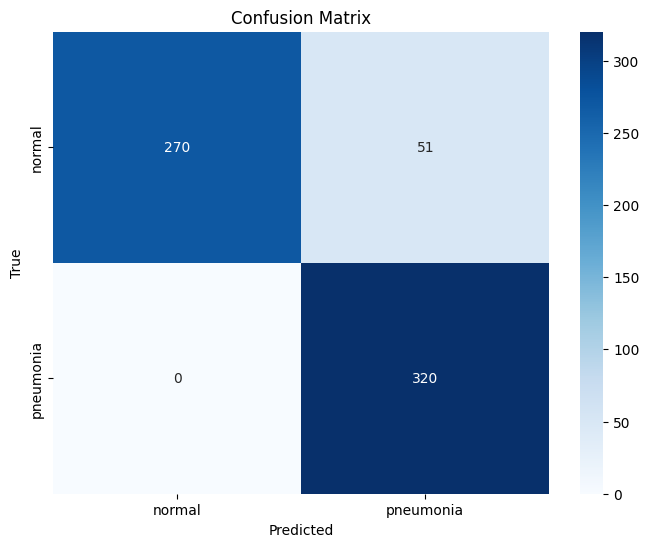

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")  # <- only the title, no accuracy
plt.show()


# 7---🔹 Train loop using SAM (two-step)
## step 1: First step = climb to sharp region (SAM perturbation).
## Step 2: Second step = update weights toward flat minimum (better generalization).
## Step 3 :Evaluate = check model performance without updating weights.
## Step 4 : Scheduler = adjust LR gradually.
## Step 5 : Checkpointing = keep the best model based on validation accuracy.
## 📌  This step sets up how your CoAtNet-Nano + SAM will learn during training.👉 Without SAM, this loop would only have one forward + one backward + optimizer.step() per batch.
## 👉 With SAM, you do two forwards + two backwards per batch (more expensive, but more robust)

Using target layer: stages.3.blocks.1.mlp.fc2


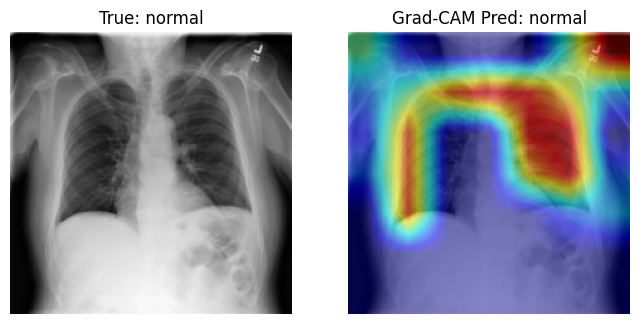

In [17]:
# =====================================================
# 7. Grad-CAM Visualization
# =====================================================
def unnormalize_tensor(img_tensor, mean, std):
    img = img_tensor.cpu().numpy().transpose(1, 2, 0)
    mean, std = np.array(mean), np.array(std)
    img = (img * std) + mean
    return np.clip(img, 0, 1)

def find_last_conv(model):
    last, last_name = None, None
    for n, m in model.named_modules():
        if isinstance(m, nn.Conv2d):
            last, last_name = m, n
    if last is None:
        raise ValueError("No Conv2d layer found.")
    print("Using target layer:", last_name)
    return last

target_layer = find_last_conv(model)

idx = 5  # pick a test sample
img_tensor, true_label = test_dataset[idx]
inp = img_tensor.unsqueeze(0).to(device)

cam = GradCAM(model=model, target_layers=[target_layer])

model.eval()
with torch.no_grad():
    out = model(inp)
pred_class = int(out.argmax(dim=1).cpu())

targets = [ClassifierOutputTarget(pred_class)]
grayscale_cam = cam(input_tensor=inp, targets=targets)
mask = grayscale_cam[0]

img_for_display = unnormalize_tensor(img_tensor, data_config['mean'], data_config['std'])
cam_image = show_cam_on_image(img_for_display, mask, use_rgb=True)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img_for_display); plt.title(f"True: {class_names[true_label]}"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cam_image); plt.title(f"Grad-CAM Pred: {class_names[pred_class]}"); plt.axis('off')
plt.show()

# 8.🔹 Training Loss & Validation Accuracy Plot

In [ ]:
# =====================================================
# 8. Training Loss & Validation Accuracy Plot
# =====================================================

# Store history during training
train_losses = []
val_losses = []
train_accs = []
val_accs = []

best_acc = 0.0
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, val_preds, val_labels = evaluate(model, test_loader, criterion, device)

    scheduler.step()

    # save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train loss: {train_loss:.4f} acc: {train_acc:.4f} | "
          f"Val loss: {val_loss:.4f} acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_coatnet_sam.pth")
        print("Saved best model.")


# =====================================================
# 9. Plot Curves (with Seaborn)
# =====================================================
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid", font_scale=1.2)

epochs = range(1, num_epochs+1)

plt.figure(figsize=(14,6))

# Plot Loss
plt.subplot(1,2,1)
sns.lineplot(x=epochs, y=train_losses, label='Train Loss', marker="o")
sns.lineplot(x=epochs, y=val_losses, label='Validation Loss', marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
sns.lineplot(x=epochs, y=train_accs, label='Train Accuracy', marker="o")
sns.lineplot(x=epochs, y=val_accs, label='Validation Accuracy', marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()




Epoch 1/20


Train batches: 100%|██████████| 170/170 [01:34<00:00,  1.80it/s]


Train loss: 0.1914 acc: 0.9171 | Val loss: 0.1667 acc: 0.9189
Saved best model.

Epoch 2/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.81it/s]


Train loss: 0.1873 acc: 0.9160 | Val loss: 0.1666 acc: 0.9189

Epoch 3/20


Train batches: 100%|██████████| 170/170 [01:33<00:00,  1.82it/s]


Train loss: 0.1856 acc: 0.9163 | Val loss: 0.1669 acc: 0.9189

Epoch 4/20


Train batches: 100%|██████████| 170/170 [01:35<00:00,  1.79it/s]


Train loss: 0.1843 acc: 0.9171 | Val loss: 0.1657 acc: 0.9189

Epoch 5/20


Train batches: 100%|██████████| 170/170 [08:10<00:00,  2.89s/it] 


Train loss: 0.1827 acc: 0.9163 | Val loss: 0.1657 acc: 0.9189

Epoch 6/20


Train batches:  44%|████▎     | 74/170 [03:36<1:16:51, 48.04s/it]

# 9-🔹 Loss Curve Code for CoAtNet-0 + SAM + AdamW


In [ ]:
# =====================================================
# Track losses & accuracies
# =====================================================
train_losses = []
val_losses = []
train_accs = []
val_accs = []

best_acc = 0.0
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, val_preds, val_labels = evaluate(model, test_loader, criterion, device)

    scheduler.step()

    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train loss: {train_loss:.4f} acc: {train_acc:.4f} | "
          f"Val loss: {val_loss:.4f} acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_coatnet_sam.pth")
        print("Saved best model.")


## We’ll see a clean loss curve (Train vs Validation) across epochs, which will help check:

##==>  If train loss decreases smoothly (optimizer working well).

##==>  If validation loss plateaus/diverges (signs of overfitting).

In [ ]:
# =====================================================
# Plot Loss Curve
# =====================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve (CoAtNet-0 + SAM + AdamW)")
plt.legend()
plt.grid(True)
plt.show()
